In [1]:
# Load packages

import tensorflow as tf
import tensorflow.keras as ks
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt

import numpy as np

# from sklearn.datasets import load_diabetes
# from sklearn.model_selection import train_test_split

In [2]:
# Print tensorflow version and check it's found the GPU

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.5.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Load and scale dataset

(x_train, y_train), (x_test, y_test) = ks.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Check dimensions of data

print(x_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 1)


In [5]:
# Define convolutional neural network model

model = ks.models.Sequential([
    Conv2D(32, (5,5), input_shape=(32,32,3), activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Conv2D(32, (2,2), kernel_regularizer=ks.regularizers.l2(1e-3), 
           activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Flatten(),
    Dense(10, kernel_initializer='he_uniform', bias_initializer='ones', 
          activation='relu'),
    Dense(10)
])

In [6]:
# View model properties

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4

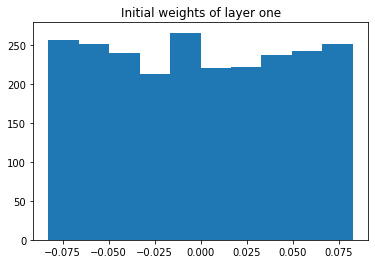

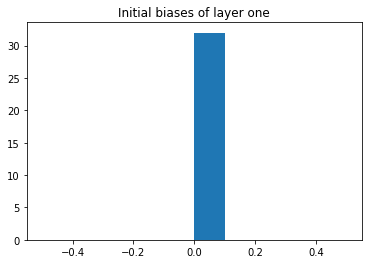

In [7]:
# View initial weights and biases in layer one

plt.hist(model.layers[0].weights[0].numpy().flatten())
plt.title("Initial weights of layer one")
plt.show()
plt.hist(model.layers[0].weights[1].numpy().flatten())
plt.title("Initial biases of layer one")
plt.show()

In [8]:
# Compile the model with an optimizer, a loss function, and a metric

model.compile(
    optimizer='adam', 
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [9]:
# Write a custom callback

class TrainingCallback(ks.callbacks.Callback):
    def on_train_end(self, logs=None):
        print(f"Finishing training, final loss {logs['loss']}")


In [10]:
# Make early stopping callback

early_stopping = ks.callbacks.EarlyStopping(
    patience=5, 
    monitor='val_accuracy', 
    mode='max'
)

In [ ]:
# # Define the learning rate schedule function

# def lr_function(epoch, lr):
#     if epoch % 2 == 0:
#         return lr
#     else:
#         return lr + epoch/1000
    
# lrs = tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)

In [ ]:
csvl = tf.keras.callbacks.CSVLogger("results.csv")]

In [ ]:
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.2, verbose=1)

In [11]:
# Fit the model to the data - use verbose=2 and check epoch time and terminal messages while adjusting batch_size.  Depends on model size more than data

history = model.fit(
#     Datasets with only one channel (MNIST and FashionMNIST)
#     x_train[...,np.newaxis], y_train, batch_size=1024, epochs=50, verbose=2,
    x_train, y_train, batch_size=1024, epochs=50, verbose=2,
    callbacks=[early_stopping, TrainingCallback(), csvl, rlrop], 
    validation_split=0.1
)

Epoch 1/50
44/44 - 5s - loss: 2.2385 - accuracy: 0.2686 - val_loss: 2.5900 - val_accuracy: 0.1066
Epoch 2/50
44/44 - 3s - loss: 1.6759 - accuracy: 0.4390 - val_loss: 2.9923 - val_accuracy: 0.0950
Epoch 3/50
44/44 - 3s - loss: 1.4188 - accuracy: 0.5197 - val_loss: 3.0860 - val_accuracy: 0.1146
Epoch 4/50
44/44 - 3s - loss: 1.2324 - accuracy: 0.5821 - val_loss: 3.6792 - val_accuracy: 0.1392
Epoch 5/50
44/44 - 3s - loss: 1.0946 - accuracy: 0.6274 - val_loss: 3.4290 - val_accuracy: 0.1284
Epoch 6/50
44/44 - 3s - loss: 0.9907 - accuracy: 0.6626 - val_loss: 3.4731 - val_accuracy: 0.1184
Epoch 7/50
44/44 - 3s - loss: 0.9132 - accuracy: 0.6922 - val_loss: 3.8497 - val_accuracy: 0.1054
Epoch 8/50
44/44 - 3s - loss: 0.8430 - accuracy: 0.7154 - val_loss: 3.7023 - val_accuracy: 0.1310
Epoch 9/50
44/44 - 3s - loss: 0.7859 - accuracy: 0.7356 - val_loss: 2.6310 - val_accuracy: 0.2522
Epoch 10/50
44/44 - 3s - loss: 0.7393 - accuracy: 0.7511 - val_loss: 2.4787 - val_accuracy: 0.2918
Epoch 11/50
44/44 -

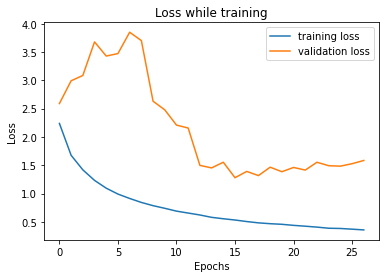

In [12]:
# Plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.title('Loss while training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

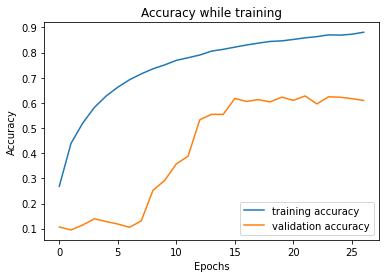

In [13]:
# Plot accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.title('Accuracy while training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [14]:
# Check performance on held out test set

model.evaluate(x_test, y_test, 1024)

10/10 [==============================] - 0s 36ms/step - loss: 1.6196 - accuracy: 0.6088


[1.6195520162582397, 0.6087999939918518]

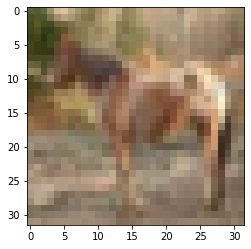

label horse
prediction deer


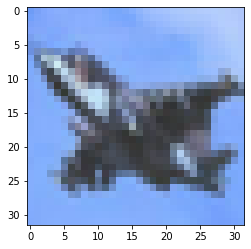

label airplane
prediction airplane


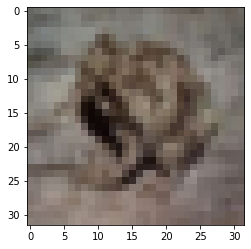

label frog
prediction frog


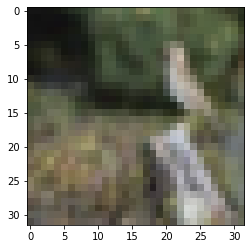

label bird
prediction frog


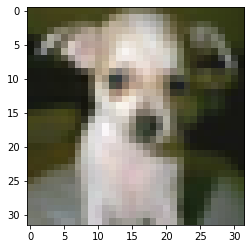

label dog
prediction dog


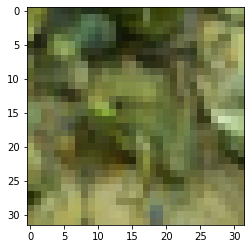

label frog
prediction frog


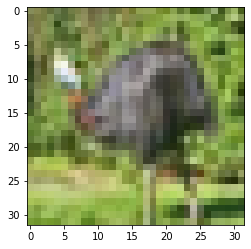

label bird
prediction bird


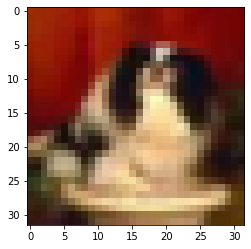

label dog
prediction dog


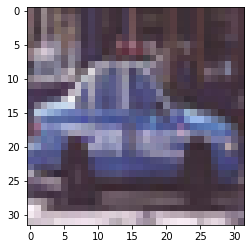

label automobile
prediction automobile


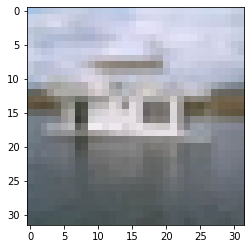

label ship
prediction ship


In [15]:
# Show some predictions on the test set

# FashionMNIST
# labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
#           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cifar10
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

n_samples = 10
samples = np.random.choice(list(range(int(1e4))), n_samples)

for i in range(n_samples):
    s = samples[i]
    plt.imshow(x_test[s])
    plt.show()
    print(f"label {labels[int(y_test[s])]}")
    print(f"prediction {labels[np.argmax(model.predict(x_test[np.newaxis, s, ...]))]}")